In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Lbox = 40  #size of the box
ref = np.array([3,5,23])   # reference coordinate (x0, y0 , z0)

In [5]:
Ntot = 1000

FAKE_DATA = Lbox * np.random.rand(Ntot, 3) 

In [6]:
FAKE_DATA

array([[ 4.8461419 , 24.5442694 ,  5.55444586],
       [36.1637498 , 29.03198255,  0.04517691],
       [28.80664965, 19.54258093, 19.55662972],
       ...,
       [32.42634886, 18.3984743 , 35.58776846],
       [17.98493214, 32.97094304, 19.39405025],
       [37.18481359, 13.03798031,  7.73648261]])

# FIND THE DISTANCES OF ALL THE POINTS IN FAKE_DATA to ref

In [7]:
distance = np.sum((ref[None,:]-FAKE_DATA)**2  ,  axis = 1 )**0.5

# FIND THE NUMBER OF POINTS THAT ARE WITHIN [3,5] TO THE REFERENCE POINT

In [8]:
#print distance[3]

In [9]:
np.max(distance)

52.600410648416215

In [10]:
np.min(distance)

2.12817358670679

In [11]:
A =(5 < distance) & ( distance < 15)

In [12]:
#print A

In [13]:
distance[A]

array([12.78606734, 13.86664303, 11.2956584 , 13.73031726, 12.791519  ,
       12.40617611, 10.93983358,  6.12216487, 11.34669588,  6.96229867,
       12.83364641, 11.96069962, 12.28565928,  8.5502125 ,  8.27316028,
        7.28583062, 14.28929708, 13.58959108, 14.90748101, 14.69954847,
       13.51858316, 14.8897745 , 13.23280905, 12.09987934, 14.54207505,
       13.05438966,  5.8397735 , 10.52339052, 13.88815718, 12.69446249,
       11.2732252 , 14.42258294, 13.73184934, 14.32364437,  9.7128724 ,
       14.93331346, 13.13854228, 11.67017113,  6.75253017, 13.86176307,
       10.68722286,  6.49968691, 14.68312043, 12.96949063, 12.86893783,
       12.35438858,  6.23783761, 11.48728043, 11.66348149, 12.39328777,
       14.17128549,  5.7417098 , 13.84269835, 12.50714818, 10.10754848,
        8.06098483, 10.08496875, 12.15384133, 10.14197013,  7.72095182,
        8.18317217, 13.50526427, 11.55662951, 14.61420651, 14.95864117,
       14.33613174,  8.40877014,  8.98432583,  7.02625789,  9.99

In [14]:
len(distance[A])

108

# FIND THE AVERAGE NUMBER OF POINTS THAT ARE WITHIN [3,5] FROM OTHER POINTS

In [15]:
zebra = []

for point in FAKE_DATA:
    
    distance_to_point = np.sum((point[None,:]-FAKE_DATA)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
    A = (5 < distance_to_point) & ( distance_to_point < 15)
    x = len(distance_to_point[A])
    zebra.append(x)

In [16]:
zebra  = np.array(zebra)

In [17]:
#zebra

WHAT IS IN ZEBRA? [59, 111, ...]

That means there are 59 points between 5 and 15 Mpcs away from the first point, and there 111 points between 5 and 15 
Mpcs away from the second point, ... 

In [18]:
np.mean(zebra) # this is the average number of points that are between 5 and 15 Mpcs away from other points in our data

132.352

# introduction to lists

In [19]:
l = []
l.append(1)
print l

[1]


In [20]:
l.append(2)

In [21]:
l.append(-10)

In [22]:
l

[1, 2, -10]

In [23]:
np.array(l)

array([  1,   2, -10])

In [24]:
tugba = np.array([1,2])
sinem = [1,2]

In [25]:
sinem.append(3)

In [26]:
print sinem

[1, 2, 3]


In [27]:
#for [3,5] defination function (a,b):  and return average  a-min. b-max.


def func(amin,bmax):
    
    """this function returns average number of 
    all galaxies between [a,b] to other galaxies """
    
    zebra = []

    for point in FAKE_DATA:
    
        distance_to_point = np.sum((point[None,:]-FAKE_DATA)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
        A = (amin < distance_to_point) & ( distance_to_point < bmax)
        x = len(distance_to_point[A])
        zebra.append(x)
    zebra= np.array(zebra)
        
    return np.average(zebra)


In [28]:
func(2,4) #if you write (amin,bmax) it gives you 

3.262

In [29]:
def func2():
    """it returns func(2,4) and func(4,6) -- 
    sonunda [2,4] için olan sonuç değeri vericek bize."""
    listnew = []
    lister = [2,4,6,8,10,12]
    for i in lister:
        listnew.append(func(i,i+2))
    return listnew

In [30]:
func2() 

[3.262, 8.076, 14.58, 22.576, 30.116, 38.236]

In [31]:
def f(x):
    a = x**2 
    return a

# now we want to find the average number of fake date to galaxies around fake date one galaxies . So we need two fake data.

In [32]:
Lbox1 =  40 #size of the box
Ntot1 = 1000
Ntot2 = 1500

FAKE_DATA1 = Lbox1 *np.random.rand(Ntot1,3)
FAKE_DATA2 = Lbox1 *np.random.rand(Ntot2,3)

In [33]:
FAKE_DATA1 #x,y,z kolonları gosterıyor(üç kolon için)

array([[12.34484774, 31.22745301,  2.84194879],
       [37.41403217, 27.32712966, 14.98369661],
       [ 7.62600882,  6.4875416 ,  1.96341177],
       ...,
       [27.61742279,  1.80380001, 12.25637311],
       [36.1553505 , 36.59958985, 33.88921108],
       [ 3.59350978,  7.23032873, 18.63183513]])

In [34]:
FAKE_DATA2

array([[10.27611926,  1.61396321, 24.92628279],
       [29.18949384, 21.9355998 ,  4.73191089],
       [27.58807593,  6.59920096, 21.07576695],
       ...,
       [17.94181502, 17.13772547,  3.68735867],
       [25.78959612,  7.18313962, 24.67704138],
       [14.41709963,  4.62323023, 34.20440945]])

In [35]:
#for [3,5] defination function (a,b):  and return average  a-min. b-max.


def func(amin,bmax,data1,data2):
    
    """this function returns average number of 
    data1 points and data2 points between amin and bmax"""
    
    zebra = []

    for point in data1:
    
        distance_to_point = np.sum((point[None,:]-data2)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
        A = (amin < distance_to_point) & ( distance_to_point < bmax)
        x = len(distance_to_point[A])
        zebra.append(x)
    zebra= np.array(zebra)
        
    return np.average(zebra)


In [36]:
func(5,20,FAKE_DATA1,FAKE_DATA2) 
"""the average number of data one points(FAKE_DATA1) around 
data two point(FAKE_DATA2) between 5and20"""

'the average number of data one points(FAKE_DATA1) around \ndata two point(FAKE_DATA2) between 5and20'

In [37]:
def func2():
    """
    it returns func at (2,4),(4,6) etc. sonun da (2,4) için net sonucu verir.  """
    listnew = []
    lister = [2,4,6,8,10,12]
    for i in lister:
        listnew.append(func(i,i+2,FAKE_DATA1,FAKE_DATA2))
    return listnew

In [38]:
func2()

[4.745, 11.883, 21.367, 32.553, 44.334, 56.614]

# make plot func2() and put in the overleaf 

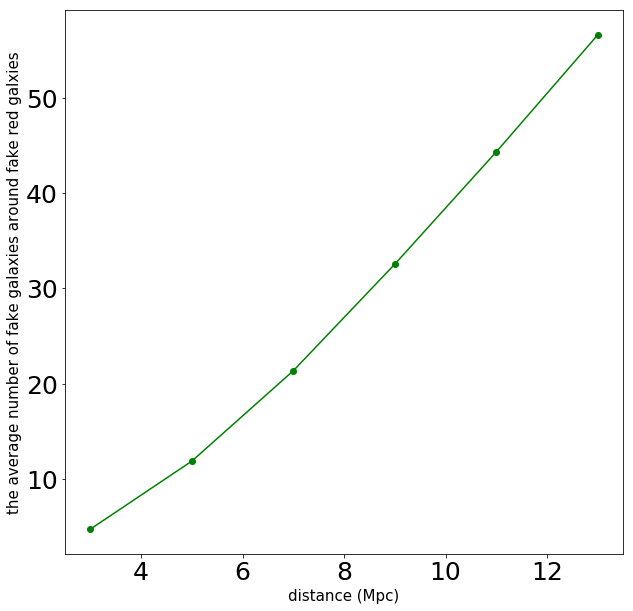

In [39]:
plt.figure(figsize=(10,10))

#x = [2,4,6,8,10,12,14]
x = [3,5,7,9,11,13]
y = func2()
plt.plot(x,y, marker = "o", color ="g")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel("the average number of fake galaxies around fake red galxies",fontsize=15)
plt.xlabel("distance (Mpc)",fontsize=15)
plt.savefig("figure1.pdf")

In [40]:
"12"+"q"

'12q'

In [41]:
a = 2
str(a)+"q"

'2q'